# Exercises

There are several main adjustments you may try.

Please pay attention to the time it takes for each epoch to conclude.

Using the code from the lecture as the basis, fiddle with the hyperparameters of the algorithm.

1. The *width* (the hidden layer size) of the algorithm. Try a hidden layer size of 200. How does the validation accuracy of the model change? What about the time it took the algorithm to train? Can you find a hidden layer size that does better?

2. The *depth* of the algorithm. Add another hidden layer to the algorithm. This is an extremely important exercise! How does the validation accuracy change? What about the time it took the algorithm to train? Hint: Be careful with the shapes of the weights and the biases.

3. The *width and depth* of the algorithm. Add as many additional layers as you need to reach 5 hidden layers. Moreover, adjust the width of the algorithm as you find suitable. How does the validation accuracy change? What about the time it took the algorithm to train?

4. Fiddle with the activation functions. Try applying sigmoid transformation to both layers. The sigmoid activation is given by the string 'sigmoid'.

5. Fiddle with the activation functions. Try applying a ReLu to the first hidden layer and tanh to the second one. The tanh activation is given by the string 'tanh'.

6. Adjust the batch size. Try a batch size of 10000. How does the required time change? What about the accuracy?

7. Adjust the batch size. Try a batch size of 1. That's the SGD. How do the time and accuracy change? Is the result coherent with the theory?

8. Adjust the learning rate. Try a value of 0.0001. Does it make a difference?

9. Adjust the learning rate. Try a value of 0.02. Does it make a difference?

10. Combine all the methods above and try to reach a validation accuracy of 98.5+ percent.

Good luck!

# Deep Neural Network for MNIST Classification

We'll apply all the knowledge from the lectures in this section to write a deep neural network. The problem we've chosen is referred to as the "Hello World" of deep learning because for most students it is the first deep learning algorithm they see.

The dataset is called MNIST and refers to handwritten digit recognition. You can find more about it on Yann LeCun's website (Director of AI Research, Facebook). He is one of the pioneers of what we've been talking about and of more complex approaches that are widely used today, such as covolutional neural networks (CNNs). 

The dataset provides 70,000 images (28x28 pixels) of handwritten digits (1 digit per image). 

The goal is to write an algorithm that detects which digit is written. Since there are only 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), this is a classification problem with 10 classes. 

Our goal would be to build a neural network with 2 hidden layers.

## Import the relevant packages

In [39]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Data

That's where we load and preprocess our data.

In [40]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples

num_validation_samples = tf.cast(num_validation_samples, tf.int64)


num_test_samples = mnist_info.splits['test'].num_examples

num_test_samples = tf.cast(num_test_samples, tf.int64)

def scale(image, label):
   
    image = tf.cast(image, tf.float32)
    image /= 255.

    return image, label


scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)

validation_data = validation_data.batch(num_validation_samples)


test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

## Model

### Outline the model
When thinking about a deep learning algorithm, we mostly imagine building the model. So, let's do it :)

In [41]:
input_size = 784
output_size = 10

hidden_layer_size = 200
    
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # input layer
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'),#2nd hidden layer
    
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

### Choose the optimizer and the loss function

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
That's where we train the model we have built.

In [43]:
# determine the maximum number of epochs
NUM_EPOCHS = 5
model.fit(train_data, epochs=NUM_EPOCHS, validation_data=(validation_inputs, validation_targets), validation_steps=1, verbose =1)

Epoch 1/5
540/540 [==============================] - 9s 13ms/step - loss: 0.4623 - accuracy: 0.8636 - val_loss: 0.1298 - val_accuracy: 0.9630
Epoch 2/5
540/540 [==============================] - 5s 9ms/step - loss: 0.1097 - accuracy: 0.9653 - val_loss: 0.0887 - val_accuracy: 0.9738
Epoch 3/5
540/540 [==============================] - 5s 9ms/step - loss: 0.0731 - accuracy: 0.9767 - val_loss: 0.0756 - val_accuracy: 0.9798
Epoch 4/5
540/540 [==============================] - 5s 9ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0580 - val_accuracy: 0.9828
Epoch 5/5
540/540 [==============================] - 5s 9ms/step - loss: 0.0439 - accuracy: 0.9873 - val_loss: 0.0482 - val_accuracy: 0.9855


## Test the model

As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset. 

The test is the absolute final instance. You should not test before you are completely done with adjusting your model.

If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

In [44]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.0725 - accuracy: 0.9774


In [45]:
# We can apply some nice formatting if we want to
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.07. Test accuracy: 97.74%


1) Changing hidden layer size: Val accuracy goes 98.7%, time taken for model training is 32 seconds <br>
2)adding one more hidden layer does not change the impact that much. Validation accuracy is still same and time taken is 34 seconds <br>
3)After adding 5 hidden layers, accuracy goes down a little. It becomes 98.1% and the time taken is 39 seconds <br>
4)Putting sigmoid as activation function for both layers their is decrease in accuracy as it becomes 97.1% and time taken is 29 seconds<br>
5)After seeing decrease in accuracy and greater time, i had removed extra hidden layes and keep it to two only. After changing the activation function of second layer to tanh, their is increase in accuracy as it becomes 98.8% and time taken is 33 seconds <br>
6) After changing the batch size to 10,000 their is a lot decrease in validation accuracy as it comes around 90%. The time taken is 23 seconds.<br>
7)Changing the batch size to 1 results in the highly increase in the duration of model training. Time taken for training is around 10 minutes and change in accuracy is not much and also less than the required accuracy <br>
8) Changing the learning rate to 0.0001 results in less accuracy which is 96%.Time taken is 29 seconds. <br>
9) Changing the learning rate to 0.02 results in decrease in accuracy and it comes around 90% and the time taken is 26 seconds <br>
10) To get validation accuracy above 98.5%, the ideal parameters are batch_size=100, optimizer=adam at default learning rate, 2 hidden layers, one with relu and other with tanh as activation functions and hidden layer size as 200 <br>
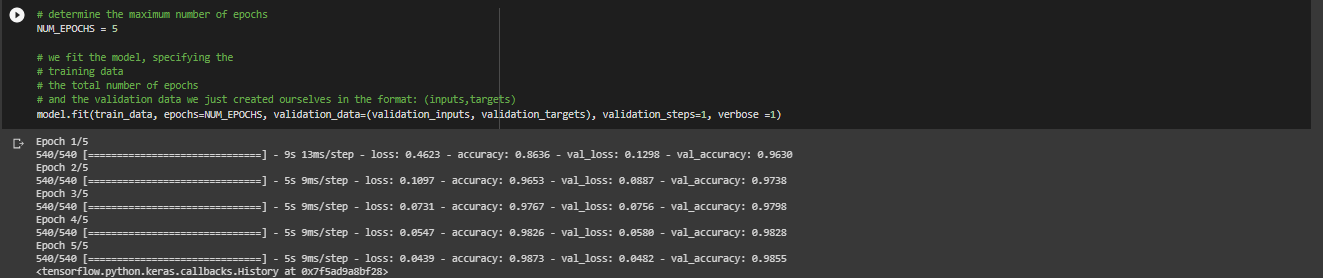

Using the initial model and hyperparameters given in this notebook, the final test accuracy should be roughly around 97%.

Each time the code is rerun, we get a different accuracy as the batches are shuffled, the weights are initialized in a different way, etc.

Finally, we have intentionally reached a suboptimal solution, so you can have space to build on it.